In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **定义数据**
一般定义数据使用torch.Tensor ， tensor的意思是张量，是数字各种形式的总称

In [2]:
import torch

x = torch.tensor(666)
print(x)

tensor(666)


In [3]:
# 一维数组（向量）
x = torch.tensor([1,2,3,4,5,6])
print(x)

tensor([1, 2, 3, 4, 5, 6])


In [4]:
# 二维数组（矩阵）
x = torch.ones(2,3) #2行3列
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# 可以是任意维度的数组（张量）
x = torch.ones(2,3,4)
print(x)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])



Tensor支持各种各样类型的数据，包括：

torch.float32, torch.float64, torch.float16, torch.uint8, torch.int8, torch.int16, torch.int32, torch.int64 。这里不过多描述。

创建Tensor有多种方法，包括：ones, zeros, eye, arange, linspace, rand, randn, normal, uniform, randperm, 使用的时候可以在线搜，下面主要通过代码展示。

In [8]:
# 创建一个空张量？
x = torch.empty(5,3) # 随机初始化一个张量
print(x)

tensor([[-1.5066e-19,  4.4881e-41, -9.8309e-39],
        [ 3.1873e-41, -9.8147e-39,  3.1873e-41],
        [-9.8497e-39,  3.1873e-41,  0.0000e+00],
        [ 0.0000e+00, -7.4799e-39,  3.1873e-41],
        [ 1.9750e+38,  3.1873e-41, -4.2450e-09]])


In [9]:
# 创建一个随机初始化的张量
x = torch.rand(5,3)
print(x)

tensor([[0.7838, 0.1176, 0.3468],
        [0.9381, 0.4946, 0.7686],
        [0.6067, 0.6637, 0.3691],
        [0.7132, 0.3189, 0.2363],
        [0.7330, 0.0188, 0.4335]])


In [10]:
# 创建一个全0的张量，里面的数据类型为 long
x = torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [11]:
# 基于现有的tensor，创建一个新tensor，
# 从而可以利用原有的tensor的dtype，device，size之类的属性信息
y = x.new_ones(5,3)   #tensor new_* 方法，利用原来tensor的dtype，device
print(y)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


In [12]:
z = torch.randn_like(x, dtype=torch.float)    # 利用原来的tensor的大小，但是重新定义了dtype
print(z)

tensor([[-0.8595, -0.5700, -0.6045],
        [-0.3851,  0.3533,  0.4780],
        [ 1.1490, -1.1429, -2.2049],
        [-0.2027, -2.6446,  0.6502],
        [ 1.0402,  1.9292, -0.4154]])



# **2. 定义操作**
凡是用Tensor进行各种运算的，都是Function

最终，还是需要用Tensor来进行计算的，计算无非是

基本运算，加减乘除，求幂求余

布尔运算，大于小于，最大最小

线性运算，矩阵乘法，求模，求行列式

**基本运算包括**： abs/sqrt/div/exp/fmod/pow ，及一些三角函数 cos/ sin/ asin/ atan2/ cosh，及 ceil/round/floor/trunc 等具体在使用的时候可以百度一下

**布尔运算包括**： gt/lt/ge/le/eq/ne，topk, sort, max/min

**线性计算包括**： trace, diag, mm/bmm，t，dot/cross，inverse，svd 等

不再多说，需要使用的时候百度一下即可。下面用具体的代码案例来学习。

In [13]:

# 创建一个 2x4 的tensor
m = torch.Tensor([[2, 5, 3, 7],[4, 2, 1, 9]])

print(m.size(0), m.size(1), m.size(), sep='    ') #（第一维大小，第二维大小，维度）

2    4    torch.Size([2, 4])


In [14]:
# 返回 m 中元素的数量
print(m.numel())

8


In [15]:
# 返回 第0行，第2列的数
print(m[0][2])

tensor(3.)


In [16]:
# 返回 第1列的全部元素
print(m[:, 1])

tensor([5., 2.])


In [17]:
# 返回 第0行的全部元素
print(m[0, :])

tensor([2., 5., 3., 7.])


In [20]:
# [1,5)
v = torch.arange(1, 5,dtype=torch.float)
print(v)

tensor([1., 2., 3., 4.])


In [21]:
# 2*1+5*2+3*3+7*4=2+10+9+28=49
# 4*1+2*2+1*3+9*4=4+4+3+36=47
m @ v

tensor([49., 47.])

In [22]:
# 1*2 + 2*5 + 3*3 + 4*7
m[[0], :] @ v

tensor([49.])

In [23]:
m + torch.rand(2, 4)

tensor([[2.1214, 5.2975, 3.8894, 7.0418],
        [4.3418, 2.6448, 1.3575, 9.8808]])

In [25]:
# 转置，由 2x4 变为 4x2
print(m.t())

# 使用 transpose 也可以达到相同的效果
print(m.transpose(0, 1))
#torch.transpose(input, dim0, dim1, out=None)
#input (Tensor) – 输入张量，必填
#dim0 (int) – 转置的第一维，默认0，可选
#dim1 (int) – 转置的第二维，默认1，可选

tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])
tensor([[2., 4.],
        [5., 2.],
        [3., 1.],
        [7., 9.]])


In [26]:
#[3,8]取20个数
torch.linspace(3, 8, 20)

tensor([3.0000, 3.2632, 3.5263, 3.7895, 4.0526, 4.3158, 4.5789, 4.8421, 5.1053,
        5.3684, 5.6316, 5.8947, 6.1579, 6.4211, 6.6842, 6.9474, 7.2105, 7.4737,
        7.7368, 8.0000])

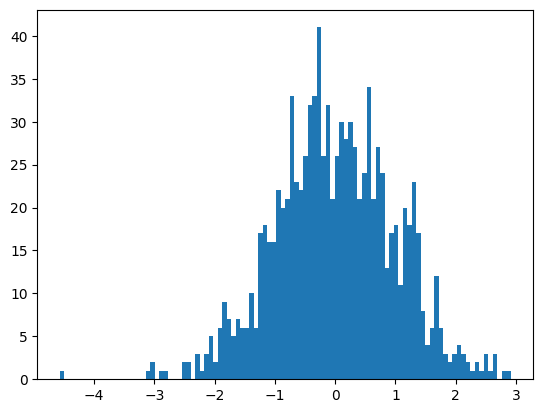

In [27]:
from matplotlib import pyplot as plt

# matlabplotlib 只能显示numpy类型的数据，下面展示了转换数据类型，然后显示
# 注意 randn 是生成均值为 0， 方差为 1 的随机数
# 下面是生成 1000 个随机数，并按照 100 个 bin 统计直方图
plt.hist(torch.randn(1000).numpy(), 100);

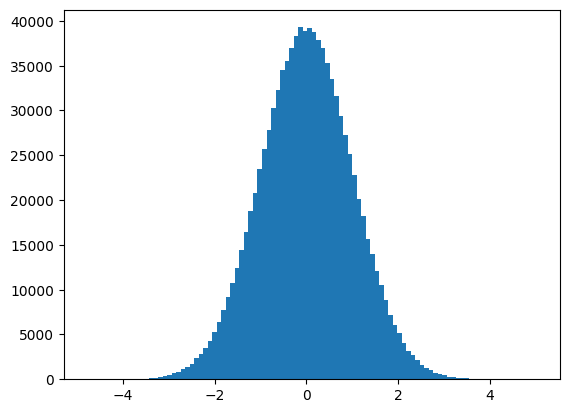

In [28]:
# 当数据非常非常多的时候，正态分布会体现的非常明显
plt.hist(torch.randn(10**6).numpy(), 100);

In [29]:
# 创建两个 1x4 的tensor
a = torch.Tensor([[1, 2, 3, 4]])
b = torch.Tensor([[5, 6, 7, 8]])

# 在 0 方向拼接 （即在 Y 方向上拼接）, 会得到 2x4 的矩阵
print( torch.cat((a,b), 0))

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


In [30]:
# 在 1 方向拼接 （即在 X 方各上拼接）, 会得到 1x8 的矩阵
print( torch.cat((a,b), 1))

tensor([[1., 2., 3., 4., 5., 6., 7., 8.]])
